In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import make_classification
X,y = make_classification (n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=2,
                          random_state=1)

In [ ]:
pd.DataFrame(X).head()

,0,1
0,1.863411,0.087646
1,-1.530997,1.901182
2,-0.017224,-2.591112
3,-2.032039,-1.801162
4,4.620555,0.901124


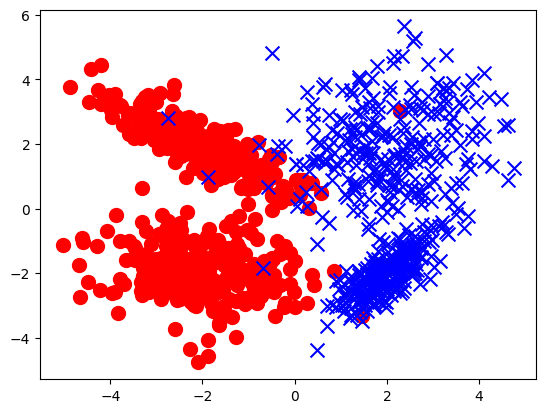

In [ ]:
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)
plt.show()

In [ ]:
class SGD():
    def __init__(self, alpha=0.5, n_iters=1000):
        self.b = None
        self._alpha = alpha
        self._n_iters = n_iters

    def gradient_step(self, b, b_grad):
        return b - self._alpha * b_grad

    def optimize(self, X, y, start_b, n_iters):
        theta = start_b.copy()
        for i in range(n_iters):
            b_grad = self.grad_func(X, y, theta)
            theta = self.gradient_step(theta, b_grad)
        return theta

    def fit(self, X, y):
        X = np.hstack([np.ones((X.shape[0], 1)), X])

        m = X.shape[1]
        start_b = np.ones(m)
        self.b = self.optimize(X, y, start_b, self._n_iters)

class LogReg(SGD):
    def sigmoid(self, X, b):
        return 1. / (1. + np.exp(-X.dot(b)))

    def grad_func(self, X, y, b):
        n = X.shape[0]
        grad = 1. / n * X.transpose().dot(self.sigmoid(X, b) - y)
        return grad

    def predict_proba(self, X):
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        return self.sigmoid(X, self.b)

    def predict(self, X):
        y_pred = self.predict_proba(X) > 0.5
        return y_pred


In [ ]:
logreg = LogReg()

In [ ]:
X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])

In [ ]:
logreg.fit(X, y)
y_pred = logreg.predict(X)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
ac = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
print(f'accuracy = {ac:.2f} F1-score = {f1:.2f}')

accuracy = 0.98 F1-score = 0.98


In [ ]:
y_pred_proba = logreg.predict_proba(X)

In [ ]:
xx, yy = np.meshgrid(
    np.arange(X.min(axis=0)[1]-1, X.max(axis=0)[1]+1, 0.01),
    np.arange(X.min(axis=0)[2]-1, X.max(axis=0)[2]+1, 0.01))

XX = np.c_[np.ones(xx.ravel().shape), xx.ravel(), yy.ravel()]
Z = logreg.predict_proba(XX)
Z = Z.reshape(xx.shape)

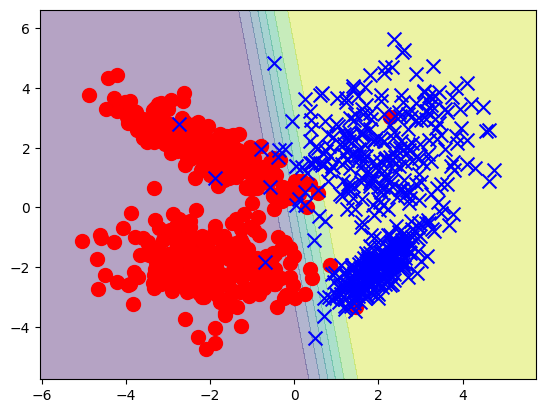

In [ ]:
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 1][y==0], X[:, 2][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 1][y==1], X[:, 2][y==1], marker="x", c='b', s=100)

Выведите результаты работы библиотечной модели - в численном и в графическом виде.

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [ ]:
model.fit(X, y)
y_pred_lr = model.predict(X)

In [ ]:
model.score(X, y)

0.976

(1461960, 2)


<ipython-input-63-884abfe9f44a>:21: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X[:, 1][y == 1], X[:, 2][y == 1], marker="x", c='b', s=100, edgecolor="k")


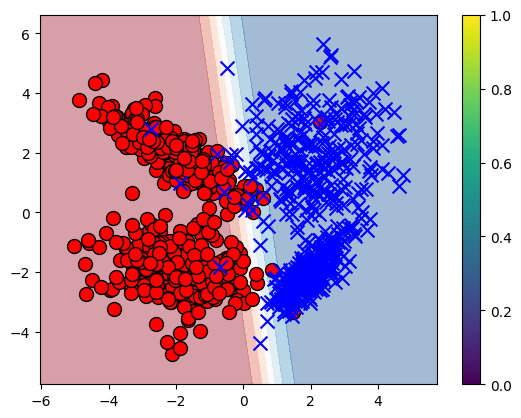

In [ ]:
xx, yy = np.meshgrid(
    np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, 0.01),
    np.arange(X[:, 2].min() - 1, X[:, 2].max() + 1, 0.01))

XX = np.c_[np.ones(xx.ravel().shape), xx.ravel(), yy.ravel()]
probas = model.predict_proba(XX)

if len(probas.shape) == 2:
    Z = probas[:, 1]
else:
    Z = probas

Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4, cmap="RdBu")
plt.scatter(X[:, 1][y == 0], X[:, 2][y == 0], marker="o", c='r', s=100, edgecolor="k")
plt.scatter(X[:, 1][y == 1], X[:, 2][y == 1], marker="x", c='b', s=100, edgecolor="k")
plt.colorbar()
plt.show()


Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42, test_size=0.33)

Learning rate: 1e-05, Train Loss: 0.47805870377570575
Learning rate: 0.0001, Train Loss: 0.4365980788103831
Learning rate: 0.001, Train Loss: 0.23747162403939584
Learning rate: 0.01, Train Loss: 0.10806154850447125
Learning rate: 0.1, Train Loss: 0.08619815515695714
Learning rate: 0.5, Train Loss: 0.08585855949649236
Learning rate: 1, Train Loss: 0.08585855528455442
Learning rate: 5, Train Loss: 0.08585855528454943
Learning rate: 10, Train Loss: 0.08585855528454943


<ipython-input-71-8a125bf41dd8>:13: RuntimeWarning: divide by zero encountered in log
  error = -y * np.log(predictions) - (1 - y) * np.log(1 - predictions)
<ipython-input-71-8a125bf41dd8>:13: RuntimeWarning: invalid value encountered in multiply
  error = -y * np.log(predictions) - (1 - y) * np.log(1 - predictions)


Learning rate: 50, Train Loss: nan


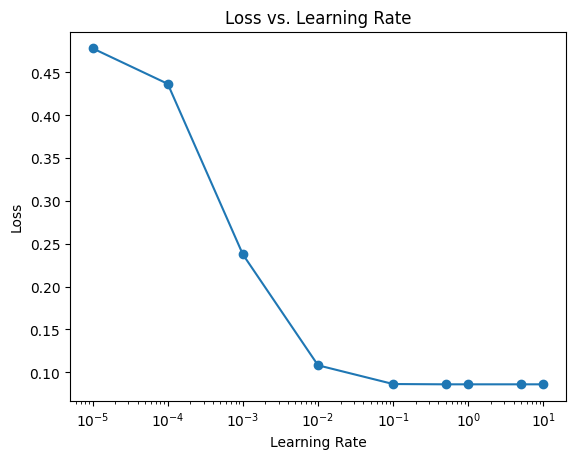

In [ ]:
learning_rates = [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 50]
losses = []

for lr in learning_rates:
    logreg = LogReg(alpha=lr)
    logreg.fit(X_train, y_train)

    train_loss = logreg.loss(X_train, y_train)
    losses.append(train_loss)
    print(f"Learning rate: {lr}, Train Loss: {train_loss}")

plt.plot(learning_rates, losses, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Loss vs. Learning Rate')
plt.xscale('log')
plt.show()


Модифицируйте код модели таким образом, чтобы фиктивный столбец единиц добавлялся к матрице признаков внутри класса.

In [ ]:
class SGD():
    def __init__(self, alpha=0.5, n_iters=1000):
        self.b = None
        self._alpha = alpha
        self._n_iters = n_iters

    def gradient_step(self, b, b_grad):
        return b - self._alpha * b_grad

    def optimize(self, X, y, start_b, n_iters):
        theta = start_b.copy()
        for i in range(n_iters):
            b_grad = self.grad_func(X, y, theta)
            theta = self.gradient_step(theta, b_grad)
        return theta

    def fit(self, X, y):
        X = np.hstack([np.ones((X.shape[0], 1)), X])

        m = X.shape[1]
        start_b = np.ones(m)
        self.b = self.optimize(X, y, start_b, self._n_iters)

class LogReg(SGD):
    def sigmoid(self, X, b):
        return 1. / (1. + np.exp(-X.dot(b)))

    def grad_func(self, X, y, b):
        n = X.shape[0]
        grad = 1. / n * X.transpose().dot(self.sigmoid(X, b) - y)
        return grad

    def predict_proba(self, X):
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        return self.sigmoid(X, self.b)

    def predict(self, X):
        y_pred = self.predict_proba(X) > 0.5
        return y_pred


Поэкспериментируйте с разными значениями параметра class_sep при генерации датасета. Визуализируйте полученные распределения. Сделайте вывод о том, как этот параметр влияет на точность получаемых моделей.

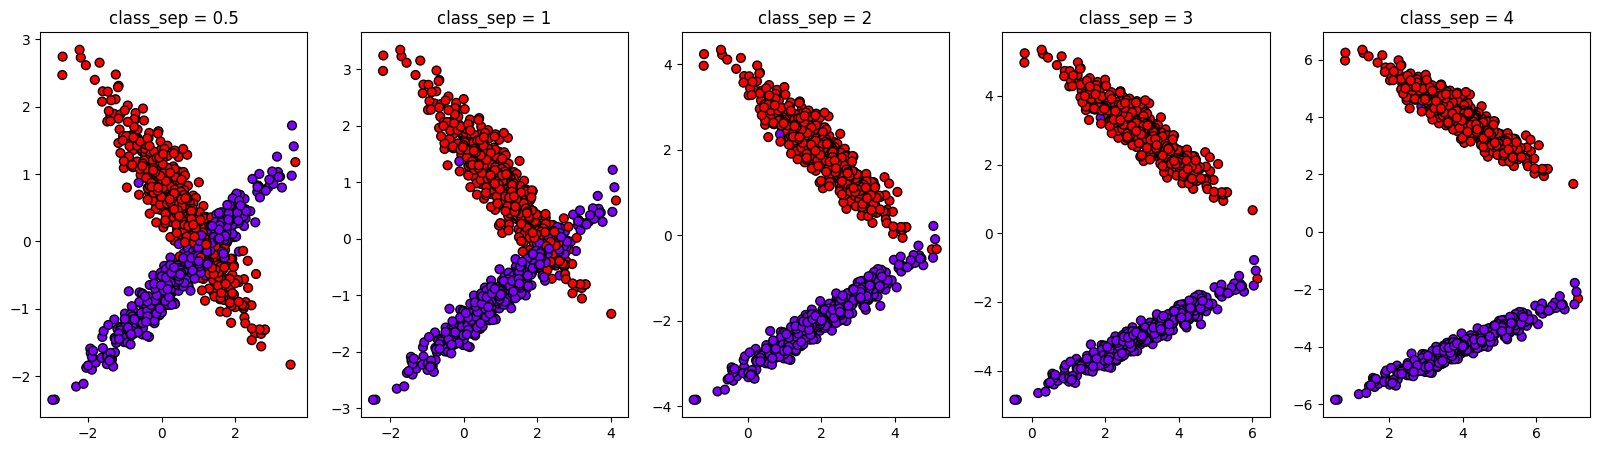

Accuracy 0.695
Accuracy 0.900
Accuracy 0.995
Accuracy 0.995
Accuracy 0.995


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class_sep_values = [0.5, 1, 2, 3, 4]
datasets = [make_classification(n_samples=1000, n_features=2, n_redundant=0, n_clusters_per_class=1, class_sep=sep, random_state=42) for sep in class_sep_values]

fig, axes = plt.subplots(1, len(class_sep_values), figsize=(20, 5))

for ax, (X, y), sep in zip(axes, datasets, class_sep_values):
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow', edgecolor='k', s=40)
    ax.set_title(f'class_sep = {sep}')

plt.show()

for (X, y), sep in zip(datasets, class_sep_values):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LogReg(alpha=0.5, n_iters=1000)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    print(f'Accuracy {acc:.3f}')


Сгенерируйте датасет с большим числом признаков и примените к нему созданную модель.


In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogReg(alpha=0.23, n_iters=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)

print(f'Accuracy: {accuracy:.3f}')


Accuracy: 0.820


Сгенерируйте датасет с большим количеством классов и реализуйте в классе алгоритм "один против всех". Решите задачу множественной классификации средствами sklearn.

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(multi_class='ovr', solver='liblinear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.3f}')


Accuracy: 0.825


Выведите значения вероятностей для каждого объекта принадлежать тому или иному классу для библиотечной модели LogisticRegression.


In [ ]:
from sklearn.linear_model import LogisticRegression

sk_model = LogisticRegression(multi_class='ovr', solver='liblinear', max_iter=1000)
sk_model.fit(X_train, y_train)

probabilities = sk_model.predict_proba(X_test)

for _, probs in enumerate(probabilities[:5]):
    print(probs)


[0.97988206 0.02011794]
[0.03558236 0.96441764]
[0.66134977 0.33865023]
[0.8948602 0.1051398]
[0.01126368 0.98873632]
